In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, datasets
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

In [ ]:
transform = transforms.Compose([transforms.ToTensor()])
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)


  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



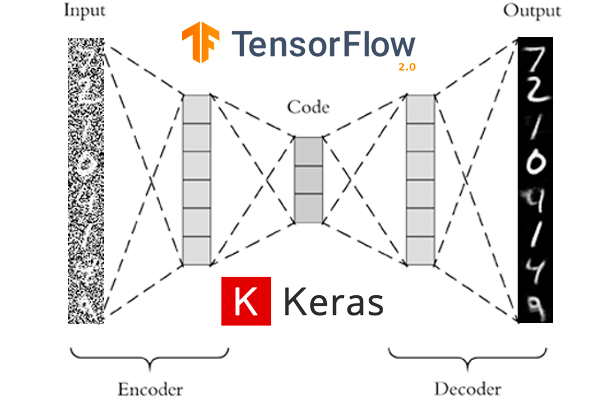

In [ ]:
img = cv2.imread("/content/drive/MyDrive/오토인코더 스터디.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
Image.fromarray(img)

In [ ]:
train_loader = DataLoader(trainset,batch_size=128,shuffle=True,drop_last=True)
test_loader = DataLoader(testset,batch_size=128,shuffle=False)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.manual_seed(156)
if device =="cuda":
  torch.cuda_manula_seed(156)

In [ ]:
class Autoencoder(nn.Module):
  def __init__(self):
    super().__init__()

    self.encoder = nn.Sequential(
        nn.Linear(28*28,128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,12),
        nn.ReLU(),
        nn.Linear(12,3),
    )

    self.decoder = nn.Sequential(
        nn.Linear(3,12),
        nn.ReLU(),
        nn.Linear(12,64),
        nn.ReLU(),
        nn.Linear(64,128),
        nn.ReLU(),
        nn.Linear(128,28*28),
        nn.Sigmoid(),
    )




  def forward(self,x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)

    return encoded,decoded

In [ ]:
model = Autoencoder().to(device)
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
criterion = nn.MSELoss()

In [ ]:
for x,y in test_loader:
  break

In [ ]:
view_data = x[:5].view(-1,28*28)

In [ ]:
for epoch in range(10):
  model.train()
  avg_loss = 0
  for i,(x,target) in enumerate(train_loader):

    x = x.view(-1,28*28).to(device)
    y = x.view(-1,28*28).to(device)
    target = target.to(device)

    encoded,decoded = model(x)
    loss = criterion(decoded,y)
    optimizer.zero_grad()

    loss.backward()
    optimizer.step()
    avg_loss += loss / len(train_loader)
  print("epoch : {}일때 loss : {}".format(epoch+1,avg_loss))



epoch : 1일때 loss : 0.044898949563503265
epoch : 2일때 loss : 0.03260999917984009
epoch : 3일때 loss : 0.03133333846926689
epoch : 4일때 loss : 0.030353600159287453
epoch : 5일때 loss : 0.030145986005663872
epoch : 6일때 loss : 0.029958758503198624
epoch : 7일때 loss : 0.029521828517317772
epoch : 8일때 loss : 0.029357099905610085
epoch : 9일때 loss : 0.0291867945343256
epoch : 10일때 loss : 0.029174605384469032


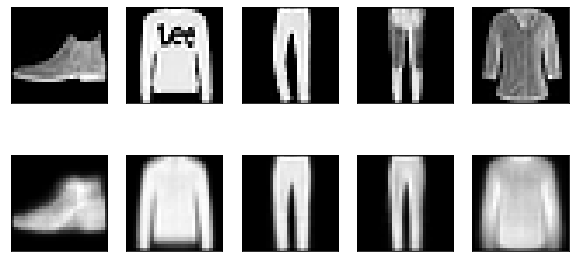

In [ ]:
fig,ax = plt.subplots(2,5,figsize=(10,5))

for i in range(5):
  img = np.reshape(view_data.numpy()[i],(28,28))
  ax[0][i].imshow(img,cmap="gray")
  ax[0][i].set_xticks(())
  ax[0][i].set_yticks(())

for i in range(5):
  img = np.reshape(decoded_data.detach().numpy()[i],(28,28))
  ax[1][i].imshow(img,cmap="gray")
  ax[1][i].set_xticks(())
  ax[1][i].set_yticks(())


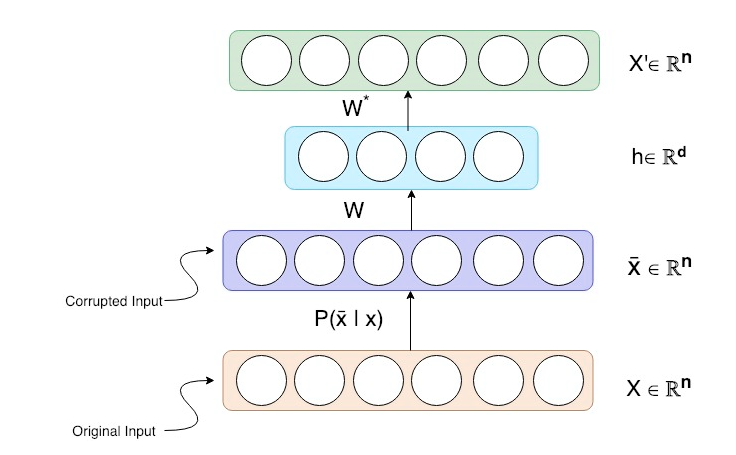

In [ ]:
img = cv2.imread("/content/drive/MyDrive/스터디 오토인코더.png")
Image.fromarray(img)

In [ ]:
def add_noise(img):
  noise = torch.randn(img.size()) * 0.3
  noisy_img = img + noise
  return noisy_img

In [ ]:
for epoch in range(10):
  model.train()
  avg_loss = 0
  for i,(x,target) in enumerate(train_loader):
    noisy_x = add_noise(x)
    noisy_x = noisy_x.view(-1,28*28).to(device)
    y = x.view(-1,28*28).to(device)
    target = target.to(device)

    encoded,decoded = model(noisy_x)
    loss = criterion(decoded,y)
    optimizer.zero_grad()

    loss.backward()
    optimizer.step()
    avg_loss += loss / len(train_loader)
  print("epoch : {}일때 loss : {}".format(epoch+1,avg_loss))

epoch : 1일때 loss : 0.02947998233139515
epoch : 2일때 loss : 0.029300663620233536
epoch : 3일때 loss : 0.029417824000120163
epoch : 4일때 loss : 0.02898811362683773
epoch : 5일때 loss : 0.029036611318588257
epoch : 6일때 loss : 0.028833061456680298
epoch : 7일때 loss : 0.02854999341070652
epoch : 8일때 loss : 0.02856498956680298
epoch : 9일때 loss : 0.02844630554318428
epoch : 10일때 loss : 0.02842995710670948


In [ ]:
for x,y in test_loader:
  break

In [ ]:
sample_data = x[:5].view(-1,28*28)
test_x = sample_data
_,decoded_data = model(test_x)

In [ ]:
original_img = sample_data
noisy_img = add_noise(original_img)
_,recovered_img = model(noisy_img)

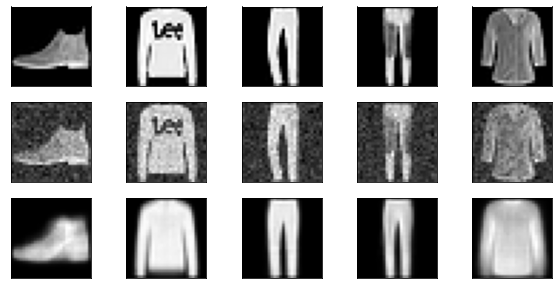

In [ ]:
fig,ax = plt.subplots(3,5,figsize=(10,5))

for i in range(5):
  img = np.reshape(original_img.numpy()[i],(28,28))
  ax[0][i].imshow(img,cmap="gray")
  ax[0][i].set_xticks(())
  ax[0][i].set_yticks(())

for i in range(5):
  img = np.reshape(noisy_img.numpy()[i],(28,28))
  ax[1][i].imshow(img,cmap="gray")
  ax[1][i].set_xticks(())
  ax[1][i].set_yticks(())

for i in range(5):
  img = np.reshape(recovered_img.detach().numpy()[i],(28,28))
  ax[2][i].imshow(img,cmap="gray")
  ax[2][i].set_xticks(())
  ax[2][i].set_yticks(())


In [ ]:
sample_data = x[0].view(-1,28*28)

In [ ]:
original_x = sample_data[0]
noisy_x = add_noise(original_x)
_,recovered_x = model(noisy_x)

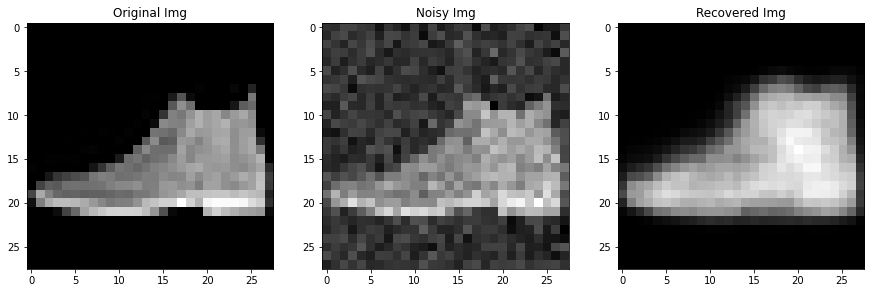

In [ ]:
fig,ax = plt.subplots(1,3,figsize=(15,15))

original_img = original_x.view(28,28)
noisy_img = noisy_x.view(28,28)
recovered_img = recovered_x.view(28,28).detach().numpy()
ax[0].set_title("Original Img")
ax[0].imshow(original_img,cmap="gray")
ax[1].set_title("Noisy Img")
ax[1].imshow(noisy_img,cmap="gray")
ax[2].set_title("Recovered Img")
ax[2].imshow(recovered_img,cmap="gray")